## Task 2.1 Unsupervised preprocessing and visualization

In [34]:
import pandas as pd

# Lade CSV aus raw
file_path = '../../data/raw/food.csv'
food_data = pd.read_csv(file_path)

food_data.head()


,Unnamed: 0,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


## Datensatz analysieren – Dimensionen prüfen

.shape sehen wir, wie viele Zeilen und Spalten der Datensatz hat.


In [35]:
# Dimensionen anzeigen
print("Dimensionen des Datensatzes:")
print(food_data.shape)


Dimensionen des Datensatzes:
(25, 10)


## Fehlende Werte prüfen

.isnull().sum() um zu zählen, wie viele Werte in jeder Spalte fehlen.


In [36]:
# Fehlende Werte in Spalten zählen
print("❓ Fehlende Werte pro Spalte:")
print(food_data.isnull().sum())


❓ Fehlende Werte pro Spalte:
Unnamed: 0    0
RedMeat       0
WhiteMeat     0
Eggs          0
Milk          0
Fish          0
Cereals       0
Starch        0
Nuts          0
Fr.Veg        0
dtype: int64


## Statistische Analyse

.describe() für statistischen Kennzahlen  


In [37]:
# Übersicht
print("Statistische Kennzahlen:")
print(food_data.describe())


Statistische Kennzahlen:
         RedMeat  WhiteMeat       Eggs       Milk       Fish    Cereals  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    9.828000   7.896000   2.936000  17.112000   4.284000  32.248000   
std     3.347078   3.694081   1.117617   7.105416   3.402533  10.974786   
min     4.400000   1.400000   0.500000   4.900000   0.200000  18.600000   
25%     7.800000   4.900000   2.700000  11.100000   2.100000  24.300000   
50%     9.500000   7.800000   2.900000  17.600000   3.400000  28.000000   
75%    10.600000  10.800000   3.700000  23.300000   5.800000  40.100000   
max    18.000000  14.000000   4.700000  33.700000  14.200000  56.700000   

          Starch       Nuts     Fr.Veg  
count  25.000000  25.000000  25.000000  
mean    4.276000   3.072000   4.136000  
std     1.634085   1.985682   1.803903  
min     0.600000   0.700000   1.400000  
25%     3.100000   1.500000   2.900000  
50%     4.700000   2.400000   3.800000  
75%     5.70

## Z-Transformation mit StandardScaler

StandardScaler aus sklearn.preprocessing


In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Spalten extrahieren
numeric_features = food_data.select_dtypes(include='number')

# StandardScaler initialisieren
scaler = StandardScaler()

# Z-Transformation durchführen
z_transformed = scaler.fit_transform(numeric_features)

# In DataFrame umwandeln
z_transformed_df = pd.DataFrame(z_transformed, columns=numeric_features.columns)

# Ausgabe
print("Z-transformierte Daten mit StandardScaler:")
print(z_transformed_df.head())



Z-transformierte Daten mit StandardScaler:
    RedMeat  WhiteMeat      Eggs      Milk      Fish   Cereals    Starch  \
0  0.082941  -1.794750 -2.224584 -1.179570 -1.225033  0.934804 -2.295965   
1 -0.282974   1.686446  1.245621  0.400468 -0.655111 -0.395051 -0.422218   
2  1.119699   0.387905  1.062979  0.055732  0.064791 -0.525246  0.889405   
3 -0.618396  -0.523837 -1.220051 -1.265754 -0.925074  2.273959 -1.983674   
4 -0.039031   0.968104 -0.124197 -0.662467 -0.685107  0.190830  0.452198   

       Nuts    Fr.Veg  
0  1.247968 -1.378251  
1 -0.910790  0.092789  
2 -0.499598 -0.076947  
3  0.322786  0.036210  
4 -1.013588 -0.076947  


## PCA (Principal Component Analysis)

Wir reduzieren auf PC1 und PC2



In [39]:
from sklearn.decomposition import PCA

# PCA initialisieren
pca = PCA(n_components=2)

# PCA anwenden
pca_result = pca.fit_transform(z_transformed_df)

# Ergebnis
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Ausgabe
print("PCA-Ergebnis:")
print(pca_df.head())


PCA-Ergebnis:
        PC1       PC2
0  3.557238 -1.664102
1 -1.452006 -1.062702
2 -1.655480  0.162784
3  3.198708 -1.327895
4 -0.378104 -0.615096


## Score Plot: PCA visualisieren

mit matplotlib.pyplot.scatter()



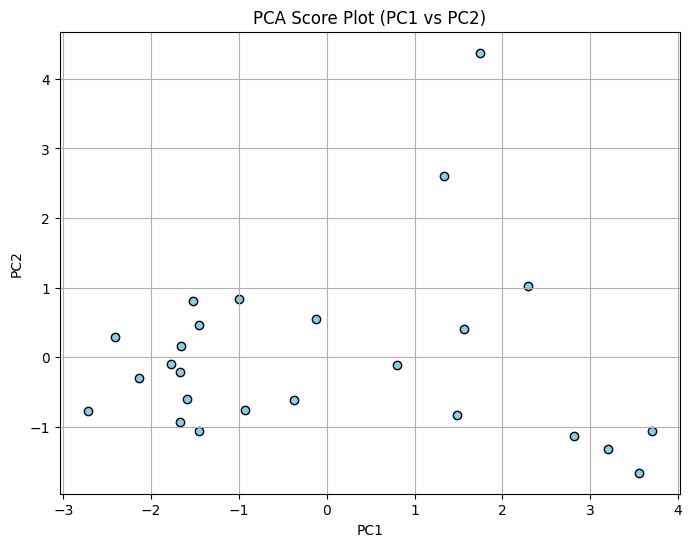

In [40]:
import matplotlib.pyplot as plt

# Score Plot erstellen
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='skyblue', edgecolor='black')

# Achsen beschriften
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Score Plot (PC1 vs PC2)")
plt.grid(True)

plt.show()
